# Credit Card Application Approval Prediction

In [19]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Data Wrangling

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIP Code           5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


* Check the age is min 23 and max is 67 so some studies are age sensitive such as anyone underage have to be drop

In [22]:
df1 = df.drop(['ID', 'ZIP Code'], axis=1)
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


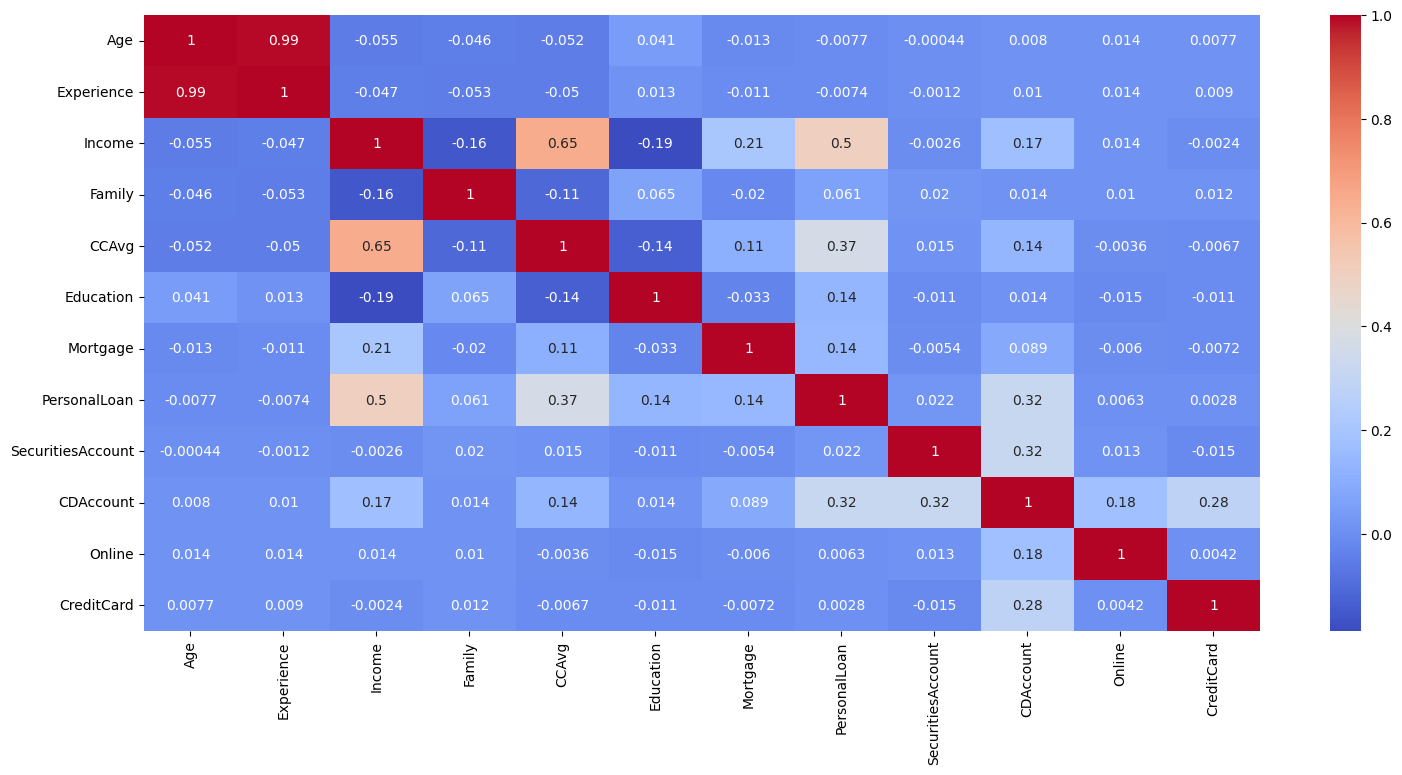

In [23]:
#Plot heat map
#max size to plot size is (18,22)
plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
df1['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [25]:
#Define the predictor (x-axis) and convert to arrays
X = df1.iloc[:, :-1].values

#Define the prediction value (y-axis) and convert to arrays
y=df['CreditCard'].values

### Train and Test / Split

In [26]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#check the train data
X_train.shape

(4000, 11)

### SVM Models (Before Data Normalization)

* Evaluation metrics used:
  * Accuracy Score

In [27]:
#modeling with SVM (RBF)

#Import libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

SVM_bank = SVC() #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print ('The accuracy based on RBF kernal is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy based on RBF kernal is:  70.39999999999999


In [ ]:
#modeling with SVM (Linear)

SVM_bank = SVC(kernel='linear') #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print ('The accuracy based on linear kernal is: ', (accuracy_score(y_test, y_hat))*100)

In [ ]:
#modeling with SVM (poly)

SVM_bank = SVC(kernel='poly') #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print ('The accuracy based on polynomial kernal is: ', (accuracy_score(y_test, y_hat))*100)

In [ ]:
#modeling with SVM (sigmoid)

SVM_bank = SVC(kernel='sigmoid') #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print ('The accuracy based on sigmoid kernal is: ', (accuracy_score(y_test, y_hat))*100)

### SVM Models (After Data Normalization)

* Evaluation metrics used:
  * Accuracy Score

In [ ]:
#Data Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[:5]

In [15]:
#modeling with SVM (RBF)

SVM_bank = SVC() #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print ('The accuracy based on RBF kernal is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy based on RBF kernal is:  74.9


In [16]:
#modeling with SVM (Linear)

SVM_bank = SVC(kernel='linear') #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print ('The accuracy based on linear kernal is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy based on linear kernal is:  74.7


In [17]:
#modeling with SVM (poly)

SVM_bank = SVC(kernel='poly') #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print ('The accuracy based on polynomial kernal is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy based on polynomial kernal is:  74.9


In [18]:
#modeling with SVM (sigmoid)

SVM_bank = SVC(kernel='sigmoid') #If you don't add parameter it will run kernal as 'rbf'

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print ('The accuracy based on sigmoid kernal is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy based on sigmoid kernal is:  62.5
